# Decision Tree Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
average = df['Item_Weight'].mean()

In [6]:
df['Item_Weight'].fillna(value=average, inplace=True)

In [7]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [8]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [9]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,1,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y =StandardScaler()

In [11]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [12]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# ข้อที่ 54
from sklearn.tree import DecisionTreeRegressor
df_regressor = DecisionTreeRegressor()
df_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
predicted = sc_y.inverse_transform(df_regressor.predict(X_test))
predicted

array([ 306.268 ,  669.129 ,  690.4346, ...,  690.4346,  199.74  ,
       2542.0244])

In [18]:
y_test = sc_y.inverse_transform(y_test)
y_test

array([[1743.0644],
       [ 356.8688],
       [ 377.5086],
       ...,
       [ 629.181 ],
       [ 253.004 ],
       [ 976.7286]])

In [19]:
# ข้อที่ 55
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
print('MSE: ', metrics.mean_squared_error(y_test, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2 score: ', metrics.r2_score(y_test, predicted))

MAE:  1006.3842301466276
MSE:  2129083.104785561
RMSE:  1459.137794995922
R2 score:  0.2166642558224331


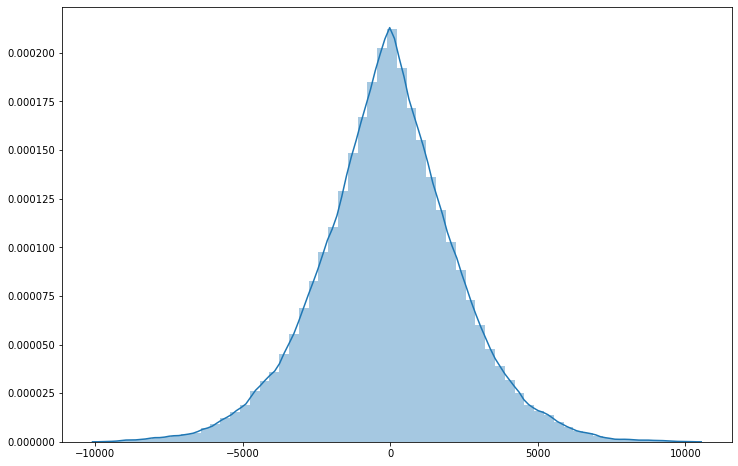

In [20]:
# ข้อที่ 56
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
sns.distplot((y_test-predicted), bins=60)

In [21]:
# ข้อที่ 57
predict_compare = {'Sales': y_test.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(predict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,306.2680
1,356.8688,669.1290
2,377.5086,690.4346
3,5778.4782,4763.7990
4,2356.9320,3372.9428
...,...,...
1700,3004.0896,373.5138
1701,890.8404,1821.6288
1702,629.1810,690.4346
1703,253.0040,199.7400


In [22]:
# ข้อที่ 58
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.615205
Predicted,0.615205,1.000000
